In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# def ABCD1(l1,l2,l3,r):
#     m1 = np.array([[1,l1/2],[0,1]])
#     m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m3 = np.array([[1,l3+2*l2],[0,1]])
#     m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m5 = np.array([[1,l1/2],[0,1]])
#     mul = np.matmul(m1,m2)
#     mul = np.matmul(mul,m3)
#     mul = np.matmul(mul,m4)
#     mul= np.matmul(mul,m5)
#     return mul
    

In [79]:
def ABCD1(l1,l2,l3,r):
    m1 = np.array([[1,l1/2],[0,1]])
    m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m3 = np.array([[1,l3+2*l2],[0,1]])
    m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m5 = np.array([[1,l1/2],[0,1]])
    mul = np.matmul(m4,m5)
    mul = np.matmul(m3,mul)
    mul = np.matmul(m2,mul)
    mul= np.matmul(m1,mul)
    return mul
    

In [80]:
# def ABCD2(l1,l2,l3,r):
#     m1 = np.array([[1,l2+l3/2],[0,1]])
#     m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m3 = np.array([[1,l1],[0,1]])
#     m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
#     m5 = np.array([[1,l2+l3/2],[0,1]])
#     mul = np.matmul(m1,m2)
#     mul = np.matmul(mul,m3)
#     mul = np.matmul(mul,m4)
#     mul= np.matmul(mul,m5)
#     return mul   

In [80]:
def ABCD2(l1,l2,l3,r):
    m1 = np.array([[1,l2+l3/2],[0,1]])
    m2 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m3 = np.array([[1,l1],[0,1]])
    m4 = np.array([[1,0],[-2/r/np.cos(0*np.pi/180),1]])
    m5 = np.array([[1,l2+l3/2],[0,1]])
    mul = np.matmul(m4,m5)
    mul = np.matmul(m3,mul)
    mul = np.matmul(m2,mul)
    mul= np.matmul(m1,mul)
    return mul   

In [81]:
def d(a,b,wl):
    return np.sqrt(wl*b/np.pi/np.sqrt(1-a**2))

In [82]:
def gauss_prop(abcd,q_i):
    q_f = (abcd[0,0]*q_i + abcd[0,1])/(abcd[1,0]*q_i + abcd[1,1])
    return q_f

def w0(q):
    return np.sqrt(-1j*wl*q/np.pi)

def w2(inv_q):
    return np.sqrt(-wl/np.pi/n_c/np.imag(inv_q))

In [21]:
l1 = 110*1e-3
l2 = 135*1e-3
l3 = 138*1e-3
r = 100*1e-3
wl = 1.087e-3*1e-3
l_c = 20*1e-3
n_c = 1.747
w_i = 280e-3/2*1e-3

m1 = np.array([[1,l3/2],[0,1]])
m2 = np.array([[1,l2],[0,1]])
m3 = np.array([[1,0],[-2/r/np.cos(23*np.pi/180),1]])
m4 = np.array([[1,l1/2-l_c/2],[0,1]])
m5 = np.array([[1,0],[0,1/n_c]])
m6 = np.array([[1,l_c/2/n_c],[0,1]])

abcd = np.matmul(m1,m2)
abcd = np.matmul(abcd,m3)
abcd = np.matmul(abcd,m4)
abcd = np.matmul(abcd,m5)
abcd = np.matmul(abcd,m6)

In [22]:
abcd

array([[-3.43235034e+00,  8.71249646e-03],
       [-2.17272075e+01, -1.11617868e-01]])

In [38]:
l1 = 110*1e-3
l2 = 135*1e-3
l3 = 138*1e-3
r = 100*1e-3
wl = 1.087e-3*1e-3
l_c = 20*1e-3
n_c = 1.747
w_i = 280e-3/2*1e-3

m1 = np.mat([[1,l3/2],[0,1]])
m2 = np.mat([[1,l2],[0,1]])
m3 = np.mat([[1,0],[-2/r/np.cos(23*np.pi/180),1]])
m4 = np.mat([[1,l1/2-l_c/2],[0,1]])
m5 = np.mat([[1,0],[0,1/n_c]])
m6 = np.mat([[1,l_c/2/n_c],[0,1]])

# abcd = m1*m2*m3*m4*m5*m6
abcd = m6*m5*m4*m3*m2*m1

In [39]:
abcd

matrix([[ -0.04891419,   0.03829803],
        [-12.43686751,  -1.96471113]])

In [40]:
q_i = 1j*wl/np.pi/w_i**2

In [41]:
q_f = gauss_prop(abcd,q_i)

In [46]:
w_scan = np.linspace(0.3e-3,0.8e-3,1000)/2
q_list = []
R = []
for w_i in w_scan:
    q_i = 1j*np.pi*w_i**2/wl
    q_f = gauss_prop(abcd,q_i)
    inv_q = 1/q_f
    q_list.append(w2(inv_q)/1e-3*2)
    R.append(np.real(inv_q))
#     R.append(np.real(q_f))

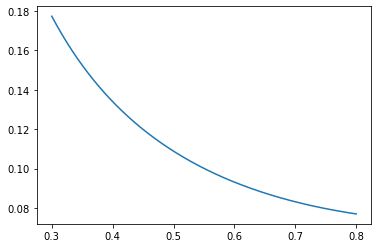

In [47]:
plt.plot(w_scan*2/1e-3,q_list)


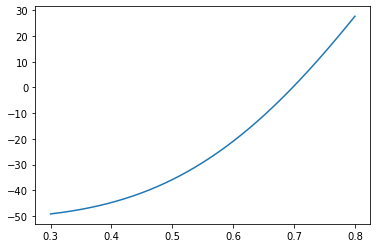

In [49]:
plt.plot(w_scan*2/1e-3,R)

In [45]:
w0(q_f)

(5.0059475866003127e-05-5.131223074900043e-06j)

In [91]:
# test params
l1 = 31e-3
l2 = 47e-3
l3 = 56e-3
r = 30e-3
wl = 5.47e-6

In [92]:
abcd1 = ABCD1(l1,l2,l3,r)
abcd2 = ABCD2(l1,l2,l3,r)

In [99]:
d1 = d(abcd1[0,0],abcd1[0,1],wl)
d2 = d(abcd2[0,0],abcd2[0,1],wl)

C:\Users\Jianhui\AppData\Local\Temp\ipykernel_27692\754505264.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wl*b/np.pi/np.sqrt(1-a**2))


In [100]:
d1

nan

In [101]:
d2

nan

In [102]:
print(d1*1000,',',d2*1000, 'μm')


nan , nan μm


In [97]:
# test params
l1 = 110e-3
l2 = 135e-3
l3 = 138e-3
r = 100e-3
wl = 1.087e-6

In [88]:
abcd1 = ABCD1(l1,l2,l3,r)
abcd2 = ABCD2(l1,l2,l3,r)

In [89]:
d1 = d(abcd1[0,0],abcd1[0,1],wl)
d2 = d(abcd2[0,0],abcd2[0,1],wl)

C:\Users\Jianhui\AppData\Local\Temp\ipykernel_27692\754505264.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(wl*b/np.pi/np.sqrt(1-a**2))


In [90]:
print(d1*1000,',',d2*1000, 'μm')


nan , nan μm


In [112]:
d2

0.28261098621882896

In [43]:
a
ma1 = ABCD1(0.115,0.138,0.135,0.100)

In [73]:
ma1 = ABCD1(115,138,135,100)

In [74]:
ma1

array([[-0.067 , -8.0025],
       [ 0.1244, -0.067 ]])

In [44]:
ma1

array([[-6.7000e-02, -8.0025e-03],
       [ 1.2440e+02, -6.7000e-02]])

In [45]:
ma1[0,1]

-0.0080025

In [46]:
ma1[0,0]**2

0.0044890000000000225

In [77]:
d(ma1[0,0],ma1[0,1],5.26e-3)

0.04619886191392761

In [76]:
ma1 = ABCD1(31,47,56,30)

In [66]:
ma1

array([[-0.73333333, -0.86666667],
       [ 0.53333333, -0.73333333]])

In [49]:
m1 = np.array([[1,100/2],[0,1]])
m2 = np.array([[1,110/2],[0,1]])

In [14]:
np.dot(m1,m2)

array([[  1., 105.],
       [  0.,   1.]])

In [9]:
np.matmul(m1,m2)

array([[  1., 105.],
       [  0.,   1.]])